# Feature Selection

다중공선성을 이용한 Feature Selection

다중공선성(multicollinearity)
> 독립 변수의 일부가 다른 독립 변수의 조합으로 표현될 수 있는 경우 
 * VIF(Variance Inflation Factor) 계산을 통해 확인

## VIF 

### 변수 제거 전

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn import linear_model

In [3]:
#2차원 배열을 만들어 'data' 변수에 할당, dataframe 으로 변환
data = {
    "x1": [1, 4, 5, 8, 10],
    "x2": [3, 5, 7, 9, 10],
    "x3": [7, 8, 5, 7, 4],
    "y": [30, 40, 45, 60, 61]
}

data = pd.DataFrame(data)
data

,x1,x2,x3,y
0,1,3,7,30
1,4,5,8,40
2,5,7,5,45
3,8,9,7,60
4,10,10,4,61


In [4]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(data[["x1", "x2", "x3"]]), y = data["y"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
#결정계수 계산
linear_regression.score(X = pd.DataFrame(data[["x1", "x2", "x3"]]), y = data["y"])

0.9952763020975957

In [6]:
#예측
prediction = linear_regression.predict(X = pd.DataFrame(data[["x1", "x2", "x3"]]))

In [7]:
#잔차
residuals = prediction - data["y"]

In [9]:
MSE = (residuals * residuals).sum()/5
MSE

0.6677419354838732

In [11]:
RMSE = MSE ** 0.5
RMSE

0.8171547806161775

x1의 다중공선성 계산을 위해, x1을 종속 변수로 다른 변수를 독립 변수로 선형 회귀

In [14]:
linear_regression.fit(X = pd.DataFrame(data[["x2", "x3"]]), y = data["x1"])

print("a value: ", linear_regression.intercept_)
print("b value: ", linear_regression.coef_)

r_square = linear_regression.score(X = pd.DataFrame(data[["x2", "x3"]]), y = data["x1"])
print("r_square: ", r_square)

a value:  -3.4623255813953495
b value:  [1.2427907  0.09860465]
r_square:  0.9730383815466063


In [15]:
#x1의 VIF 계산
vif_x1 = 1. / (1. - r_square)
vif_x1

37.08976157082763

### 변수 선택 및 제거
> 사용자 정의 함수 'VIF Calculator' 로 제거할 변수 선택

In [18]:
from sklearn.linear_model import LinearRegression

def sklearn_vif(X, y):
  r_squared = LinearRegression().fit(X, y).score(X, y)
  vif = 1. / (1. - r_squared)
  return vif

In [19]:
#x1의 vif
sklearn_vif(data[["x2", "x3"]], data["x1"])

37.08976157082763

In [20]:
#x2의 vif
sklearn_vif(data[["x1", "x3"]], data["x2"])

39.83842917251046

In [21]:
#x3의 vif
sklearn_vif(data[["x2", "x1"]], data["x3"])

1.7267882187938297

### 변수 제거 후

VIF가 10 초과인 독립변수 중 가장 VIF가 높은 x2를 제거

In [22]:
data = data[["x1", "x3", "y"]]

In [24]:
data

,x1,x3,y
0,1,7,30
1,4,8,40
2,5,5,45
3,8,7,60
4,10,4,61


In [27]:
#x1의 VIF 계산
sklearn_vif(data[["x3"]], data["x1"])

1.5339491916859123

In [28]:
#x3의 VIF 계산
sklearn_vif(data[["x1"]], data["x3"])

1.5339491916859125

In [29]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(data[["x1", "x3"]]), y = data["y"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
linear_regression.score(X = pd.DataFrame(data[["x1", "x3"]]), y = data["y"])

0.9757257443691176

In [31]:
prediction = linear_regression.predict(X = pd.DataFrame(data[["x1","x3"]]))
prediction

array([29.61778291, 42.48845266, 43.70323326, 57.4965358 , 62.69399538])

In [32]:
residuals = prediction - data["y"]

In [33]:
MSE = (residuals * residuals).sum()/5
MSE

3.4314087759815264

In [34]:
RMSE = MSE ** 0.5
RMSE

1.8524062124657017

## VIF 실습
> 미국 경제 데이터를 이용한 다중공선성 예제

In [35]:
import pandas as pd
import numpy as np

In [41]:
import matplotlib.pyplot as plt
import seaborn  as sns

%matplotlib inline

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score

In [38]:
import statsmodels.api as sm

### Data Load

In [39]:
from statsmodels.datasets.longley import load_pandas

In [40]:
#독립변수 X: 실질 GNP, GNP, 실업자수, 군대, 인구
dfX = load_pandas().exog
#종속변수 y: 고용자수(TOTEMP)
dfy = load_pandas().endog

df = pd.concat([dfX, dfy], axis = 1) #데이터프레임 생성(X, y 병합)

In [43]:
df

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR,TOTEMP
0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0,60323.0
1,88.5,259426.0,2325.0,1456.0,108632.0,1948.0,61122.0
2,88.2,258054.0,3682.0,1616.0,109773.0,1949.0,60171.0
3,89.5,284599.0,3351.0,1650.0,110929.0,1950.0,61187.0
4,96.2,328975.0,2099.0,3099.0,112075.0,1951.0,63221.0
5,98.1,346999.0,1932.0,3594.0,113270.0,1952.0,63639.0
6,99.0,365385.0,1870.0,3547.0,115094.0,1953.0,64989.0
7,100.0,363112.0,3578.0,3350.0,116219.0,1954.0,63761.0
8,101.2,397469.0,2904.0,3048.0,117388.0,1955.0,66019.0
9,104.6,419180.0,2822.0,2857.0,118734.0,1956.0,67857.0


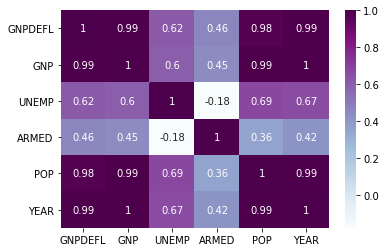

In [42]:
#dfX의 변수간 관계 시각화 (by heatmap)
sns.heatmap(dfX.corr(), annot = True, cmap = "BuPu")

In [46]:
y = df["TOTEMP"]
X = df.drop(["TOTEMP", "YEAR"], axis = 1)
X.head()

,GNPDEFL,GNP,UNEMP,ARMED,POP
0,83.0,234289.0,2356.0,1590.0,107608.0
1,88.5,259426.0,2325.0,1456.0,108632.0
2,88.2,258054.0,3682.0,1616.0,109773.0
3,89.5,284599.0,3351.0,1650.0,110929.0
4,96.2,328975.0,2099.0,3099.0,112075.0


### MinMax Scailing
> 최댓값을 1, 최솟값을 0으로 하여, 그 사이에 값들이 있도록 정제
* Xscale = (X - Xmin) / (Xmax - Xmin)

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
X_scaled

array([[0.        , 0.        , 0.16553134, 0.0626754 , 0.        ],
       [0.16224189, 0.07840489, 0.15497275, 0.        , 0.04556579],
       [0.15339233, 0.07412548, 0.61716621, 0.0748363 , 0.09633783],
       [0.19174041, 0.15692207, 0.50442779, 0.09073901, 0.14777733],
       [0.38938053, 0.29533538, 0.07799728, 0.76847521, 0.19877186],
       [0.44542773, 0.35155409, 0.02111717, 1.        , 0.25194678],
       [0.4719764 , 0.40890192, 0.        , 0.97801684, 0.33311084],
       [0.50147493, 0.4018122 , 0.58174387, 0.88587465, 0.38317092],
       [0.53687316, 0.50897522, 0.35217984, 0.74462114, 0.43518889],
       [0.63716814, 0.57669406, 0.32425068, 0.65528531, 0.49508299],
       [0.74926254, 0.65027058, 0.36307902, 0.62768943, 0.5712188 ],
       [0.820059  , 0.65581323, 0.95742507, 0.55238541, 0.63818805],
       [0.87315634, 0.77483196, 0.66178474, 0.51262862, 0.70119699],
       [0.92035398, 0.83689275, 0.70197548, 0.494855  , 0.79028167],
       [0.96460177, 0.88546342, 1.

In [49]:
X = pd.DataFrame(X_scaled, columns = X.columns)
X

,GNPDEFL,GNP,UNEMP,ARMED,POP
0,0.000000,0.000000,0.165531,0.062675,0.000000
1,0.162242,0.078405,0.154973,0.000000,0.045566
2,0.153392,0.074125,0.617166,0.074836,0.096338
3,0.191740,0.156922,0.504428,0.090739,0.147777
4,0.389381,0.295335,0.077997,0.768475,0.198772
5,0.445428,0.351554,0.021117,1.000000,0.251947
6,0.471976,0.408902,0.000000,0.978017,0.333111
7,0.501475,0.401812,0.581744,0.885875,0.383171
8,0.536873,0.508975,0.352180,0.744621,0.435189
9,0.637168,0.576694,0.324251,0.655285,0.495083


### Linear Regression

In [50]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
reg.coef_ #weight

array([-1642.88987543, 23084.79411175, -1185.7654284 , -1198.33955478,
       -9068.05060078])

In [53]:
reg.intercept_ #bias

60316.52028562989

In [54]:
print("The linear model is: Y = {} + {} * GNPDEFL + {} * GNP + {} * UNEMP + {} * ARMED + {} * POP".format(
    reg.intercept_, reg.coef_[0], reg.coef_[1], reg.coef_[2], reg.coef_[3], reg.coef_[4]
))

The linear model is: Y = 60316.52028562989 + -1642.8898754308136 * GNPDEFL + 23084.794111748713 * GNP + -1185.7654284028167 * UNEMP + -1198.3395547765758 * ARMED + -9068.050600778119 * POP


In [55]:
predictions = reg.predict(X)
predictions

array([60045.13254307, 61262.98126938, 60080.59511106, 61577.10404942,
       63678.7134359 , 64192.23972166, 64787.86941276, 63542.40042971,
       65927.85839769, 66923.40975212, 67734.37439117, 66524.21866929,
       69011.34237133, 69532.28010289, 69192.6183171 , 71058.86202547])

In [56]:
residuals = y - predictions
residuals

0     277.867457
1    -140.981269
2      90.404889
3    -390.104049
4    -457.713436
5    -553.239722
6     201.130587
7     218.599570
8      91.141602
9     933.590248
10    434.625609
11    -11.218669
12   -356.342371
13     31.719897
14    138.381683
15   -507.862025
Name: TOTEMP, dtype: float64

In [57]:
residuals.describe()

count    1.600000e+01
mean     2.273737e-12
std      3.945662e+02
min     -5.532397e+02
25%     -3.647828e+02
50%      6.106239e+01
75%      2.054978e+02
max      9.335902e+02
Name: TOTEMP, dtype: float64

In [58]:
SSE = (residuals ** 2).sum()
SST = ((y - y.mean()) ** 2).sum()

R_square = 1 - (SSE/SST)
R_square

0.9873776967532713

### Multicollinearity

In [59]:
from sklearn.linear_model import LinearRegression

In [63]:
#사용자 정의 함수 'variance_inflation_fator()'
#exog: 데이터프레임
#exog_idx: 다중공선성을 계산하고자 하는 컬럼의 인덱스

def variance_inflation_fator(exog, exog_idx):
  k_vars = exog.values.shape[1] #독립변수의 개수
  x_i = exog.iloc[:, exog_idx] #VIF를 계산하고자 하는 독립변수를 대입

  #VIF를 구하고자 하는 독립변수 인덱스 exog_ids 가 아니면 True, 맞으면 False 대입
  mask = np.arange(k_vars) != exog_idx 
  #mask가 True인 열 대입
  x_noti = exog.iloc[:, mask]

  #결정계수 계산
  r_squared_i = LinearRegression().fit(X = pd.DataFrame(x_noti), y = pd.Series(x_i)).score(X = pd.DataFrame(x_noti), y = pd.Series(x_i))
  
  #VIF
  vif = 1. / (1. - r_squared_i)
  return vif

* VIF > 10 이면, VIF가 가장 큰 컬럼 삭제
* VIF 다시 계산
* VIF > 10 이 없을 때 까지 반복


In [64]:
vif = pd.DataFrame() #다중공선성을 계산해 저장할 DataFrame
vif["features"] = X.columns
vif["VIF Factor"] = [variance_inflation_fator(X, i) for i in range(X.values.shape[1])]

In [65]:
vif

,features,VIF Factor
0,GNPDEFL,130.829201
1,GNP,639.049777
2,UNEMP,10.786858
3,ARMED,2.505775
4,POP,339.011693


In [66]:
X = X.drop(["GNP"], axis = 1) #VIF가 가장 큰 'GNP' 삭제

In [67]:
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF Factor"] = [variance_inflation_fator(X, i) for i in range(X.values.shape[1])]

In [68]:
vif

,features,VIF Factor
0,GNPDEFL,35.970754
1,UNEMP,3.147600
2,ARMED,2.497795
3,POP,34.588299


In [69]:
X = X.drop(["GNPDEFL"], axis = 1) #VIF가 가장 큰 'GNPDEFL' 삭제

In [70]:
vif = pd.DataFrame() #다중공선성을 계산해 저장할 DataFrame
vif["features"] = X.columns
vif["VIF Factor"] = [variance_inflation_fator(X, i) for i in range(X.values.shape[1])]

In [71]:
vif

,features,VIF Factor
0,UNEMP,3.146686
1,ARMED,1.918225
2,POP,3.514335


In [72]:
#VIF가 모두 < 10 이기에 해당 회귀분석 실행
reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
predictions = reg.predict(X)
predictions

array([60598.5496127 , 61281.689816  , 60273.87579533, 61373.84752219,
       63331.98715502, 64166.70776104, 65355.60064989, 63974.24109266,
       65567.29269524, 66518.76815899, 67425.21528931, 66221.51689448,
       68161.42309742, 69235.07580447, 69651.74661309, 71934.4620422 ])

In [75]:
residuals = y - predictions
residuals

0     -275.549613
1     -159.689816
2     -102.875795
3     -186.847522
4     -110.987155
5     -527.707761
6     -366.600650
7     -213.241093
8      451.707305
9     1338.231841
10     743.784711
11     291.483106
12     493.576903
13     328.924196
14    -320.746613
15   -1383.462042
Name: TOTEMP, dtype: float64

In [76]:
residuals.describe()

count    1.600000e+01
mean    -4.092726e-12
std      6.120633e+02
min     -1.383462e+03
25%     -2.868489e+02
50%     -1.353385e+02
75%      3.596200e+02
max      1.338232e+03
Name: TOTEMP, dtype: float64

In [77]:
SSE = (residuals ** 2).sum()
SST = ((y - y.mean()) ** 2).sum()

R_square = 1 - (SSE/SST)
R_square

0.96962673432005

## PCA